# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import minimize_scalar
from scipy.optimize import root_scalar
from types import SimpleNamespace

plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

from InaguralProject import ExchangeEconomyClass

## Questions

### 1 -  Illustrate the following set in the Edgeworth box

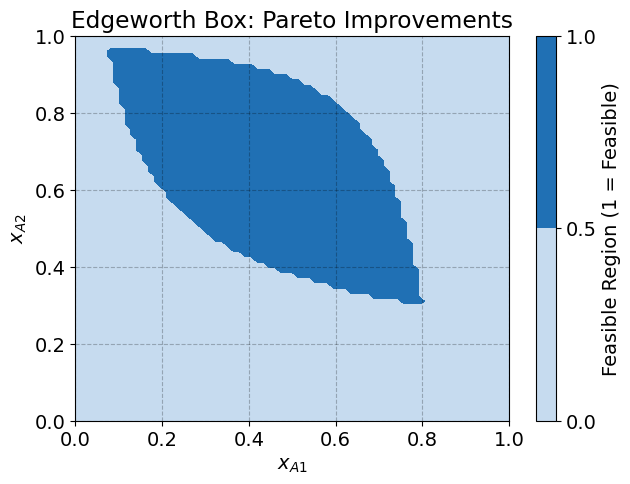

In [2]:
from InaguralProject import EconomicModel

# Calculate Pareto improvements
X_A1, X_A2, pareto_improvements = EconomicModel.calculate_pareto_improvements(N=75)

# Plotting
plt.figure(figsize=(7, 5))
plt.contourf(X_A1, X_A2, pareto_improvements, levels=1, cmap='Blues')
plt.title('Edgeworth Box: Pareto Improvements')
plt.xlabel('$x_{A1}$')
plt.ylabel('$x_{A2}$')
plt.colorbar(label='Feasible Region (1 = Feasible)')
plt.grid(True)
plt.show()


The Edgeworth box is a graphical tool used in this project to visualize how two consumers, A and B, can trade two goods to maximize their utility, given their initial endowments. Here, consumer A starts with an initial endowments of 0.8 units of good 1 and 0.3 units of good 2, while consumer B holds the remaining quantities of 0.2 units of good 1 and 0.7 units of good 2. The box’s dimensions represent the total available quantities of each good, which is 1 unit. Thus the Edgeworth box shows the Pareto relative to the endowment. 

### 2 - Calculate the error in the market clearing condition s

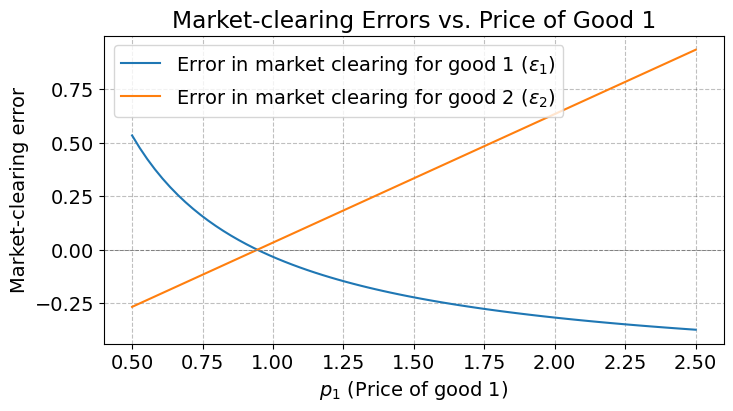

The price of good 1 when the market clears is: 0.94


In [3]:
from InaguralProject import ExchangeEconomy1

# Definition of parameters for the economy
alpha = 1/3
beta = 2/3
w1A = 0.8
w2A = 0.3

# Initialize the economy
economy = ExchangeEconomy1(alpha, beta, w1A, w2A)

# Define the range of p1 values
N = 75
p1_values = np.linspace(0.5, 2.5, N)

# Compute the market-clearing errors for plotting
p1_vals, eps1_vals, eps2_vals = economy.compute_market_clearing_errors(p1_values)

# Plotting the market-clearing errors
plt.figure(figsize=(8, 4))
plt.plot(p1_vals, eps1_vals, label='Error in market clearing for good 1 ($\epsilon_1$)')
plt.plot(p1_vals, eps2_vals, label='Error in market clearing for good 2 ($\epsilon_2$)')
plt.axhline(0, color='gray', linewidth=0.7, linestyle='--')
plt.xlabel('$p_1$ (Price of good 1)')
plt.ylabel('Market-clearing error')
plt.title('Market-clearing Errors vs. Price of Good 1')
plt.legend()
plt.grid(True)
plt.show()

# Finding the price where the error for good 1 is zero using a root-finding method
try:
    market_clearing_price = economy.find_market_clearing_price()
    print(f'The price of good 1 when the market clears is: {market_clearing_price:.2f}')
except ValueError as e:
    print(e)


In question 2, we determine the market-clearing price of good 1 using consumer demand functions and a root-finding method. The demand functions estimate how much Consumers A and B will buy at various prices, based on their initial endowments and preferences. By calculating the market-clearing errors (the difference between total demand and supply), the code visualizes where the equilibrium occurs and using the brentq root-finding method finds the precise market-clearing price. The analysis reveals that for this economy, the market-clearing price of good 1 is approximately 0.94.

### 3 - What is market clearing price?

In [4]:
from InaguralProject import MarketClearing

# Finding the market-clearing price iteratively
market_clearing_price = MarketClearing.find_market_clearing_price()
print(f"The estimated market clearing price is: {market_clearing_price}")

# Calculate allocations for consumer A at the market clearing price
allocation_A_market_clearing = [
    MarketClearing.alpha * (market_clearing_price * MarketClearing.omega_A1 + MarketClearing.p2 * MarketClearing.omega_A2) / market_clearing_price,
    (1 - MarketClearing.alpha) * (market_clearing_price * MarketClearing.omega_A1 + MarketClearing.p2 * MarketClearing.omega_A2) / MarketClearing.p2
]

# Printing the allocation for consumer A at the market clearing price
print(f"Allocation for consumer A at market clearing price: {allocation_A_market_clearing}")

# Checking the excess demand at the estimated market clearing price
excess_demand = MarketClearing.total_excess_demand(market_clearing_price)
print(f"Excess demand at the estimated price {market_clearing_price:.10f}: [{excess_demand[0]:.10f}, {excess_demand[1]:.10f}]")


The estimated market clearing price is: 0.9445450310275771
Allocation for consumer A at market clearing price: [0.3725377439738114, 0.7037573498813746]
Excess demand at the estimated price 0.9445450310: [-0.0000638953, 0.0000603519]


Thus the market clearing price of 0.94 is found. To check if the market clearing price is accurate, we test whether excess demand at the estimated market clearing price is approximatly zero. This is found to be the case, ergo the market clearing price of 0.94 is accurate.

### 4a - Find the allocation if only prices in P1 can be chosen, i.e.

In [5]:
from InaguralProject import ExchangeEconomy, find_optimal_allocation

economy = ExchangeEconomy(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3)
P1 = np.linspace(0.5, 2.5, 75)  # P1 from task description
optimal_price, optimal_allocation = find_optimal_allocation(economy, P1)

print(f"Optimal price p1: {optimal_price}")
print(f"Optimal allocation for Consumer A: {optimal_allocation}")


Optimal price p1: 1.9054054054054055
Optimal allocation for Consumer A: (0.6217494089834517, 0.6396396396396397)


In question 4A, we aim to find the optimal allocation of goods for Consumer A and determine the price of good 1 that maximizes their utility, when only prices in $ \Rho _1$ can be chosen. This is done by calculating Consumer B's demands at various prices and giving Consumer A the remaining goods. The find_optimal_allocation function identifies the price that maximizes Consumer A's utility. In the case only prices in $ \Rho _1$ can be chosen, the optimal price $ p_1$ is 1.90 and the optimal allocation for consumer A is 0.62 units of good A and 0.64 units of good 2.

### 4b - Find the allocation if any positive price can be chosen, i.e.

In [6]:
from InaguralProject import ExchangeEconomy, find_optimal_allocation, optimize_all_positive


economy = ExchangeEconomy(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3)
P1 = np.linspace(0.5, 2.5, 75)  # P1 from task description
optimal_price, optimal_allocation = find_optimal_allocation(economy, P1)

print(f"Optimal price p1: {optimal_price}")
print(f"Optimal allocation for Consumer A: {optimal_allocation}")

# Example usage for additional optimization
optimal_p1_all_positive, optimal_allocation_all_positive = optimize_all_positive(economy)

print(f"Optimal price p1 from all positives: {optimal_p1_all_positive}")
print(f"Optimal allocation for Consumer A from all positives: {optimal_allocation_all_positive}")
print(f"Optimal allocation for Consumer A (From 4a): {optimal_allocation}")

Optimal price p1: 1.9054054054054055
Optimal allocation for Consumer A: (0.6217494089834517, 0.6396396396396397)
Optimal price p1 from all positives: 1.8993449356039083
Optimal allocation for Consumer A from all positives: (0.6209679218421587, 0.6400436709597395)
Optimal allocation for Consumer A (From 4a): (0.6217494089834517, 0.6396396396396397)


In question 4B, the goal is to find the optimal price for good 1 (within a positive range) that maximizes Consumer A's utility. By minimizing the negative utility of Consumer A, the `objective` function calculates this optimal price using a bounded optimization method. 

The resulting optimal price is around 1.90. With this price, the allocation for Consumer A is approximately 0.62 for good 1 and 0.64 for good 2. These values are slightly different from the ones found previously in 4A but confirm the optimal distribution given a positive price constraint.

### 5a - Find the allocation if the choice set is restricted to C, i.e.

In [7]:
from InaguralProject import ExchangeEconomyClass

# Initialize the economy
economy = ExchangeEconomyClass(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3)

# Perform the optimization
try:
    optimal_allocation_A, optimal_utility_A = economy.optimize_allocation()
    print(f"Optimal allocation for Consumer A: {optimal_allocation_A}")
    print(f"Optimal utility for Consumer A: {optimal_utility_A}")
except ValueError as e:
    print(e)


Optimal allocation for Consumer A: [0.57574506 0.84443779]
Optimal utility for Consumer A: 0.7432276287154398


When the choice set is restricted to $ C $, the optimal allocation for consumer A is 0.58 units of good 1 and 0.84 units of good 2. This allocation maximizes utility for consumer A. 

### 5b - Find the allocation if no further restrictions are imposed, i.e.

In [8]:
import numpy as np
from InaguralProject import ExchangeEconomy2

# Initialize the economy
economy = ExchangeEconomy2(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3)

# Find the optimal allocation for Consumer A
optimal_allocation_A, optimal_utility_A = economy.find_optimal_allocation()

if optimal_allocation_A:
    print(f"Optimal allocation for Consumer A: {optimal_allocation_A}")
    print(f"Optimal utility for Consumer A: {optimal_utility_A}")
else:
    print("No feasible allocation found.")


Optimal allocation for Consumer A: (0.595959595959596, 0.8282828282828284)
Optimal utility for Consumer A: 0.7422064272565199


In question 5A, we determine the optimal allocation for Consumer A while ensuring that Consumer B's utility remains at or above its initial level. This is done by defining an objective function that maximizes Consumer A's utility and applying a constraint to maintain Consumer B's initial utility. The optimization uses the Sequential Least Squares Programming (SLSQP) method.

The optimal solution yields an allocation for Consumer A of approximately 0.60 units of good 1 and 0.83 units of good 2, resulting in maximum utility of about 0.74. This configuration provides the highest possible utility to Consumer A while ensuring that Consumer B is not worse off than their starting point.

### 6a - Find the resulting allocation

In [9]:
from InaguralProject import ExchangeEconomy3

# Initialize the economy
economy = ExchangeEconomy3(alpha=1/3, beta=2/3, w1A=0.8, w2A=0.3, w1B=0.2, w2B=0.7)

# Perform the optimization
try:
    optimal_allocation, optimal_aggregate_utility = economy.optimize_allocation()
    print(f"Optimal allocation: {optimal_allocation}")
    print(f"Optimal aggregate utility: {optimal_aggregate_utility}")
except ValueError as e:
    print(e)

Optimal allocation: [0.33340871 0.6665882  0.66659129 0.3334118 ]
Optimal aggregate utility: 1.0582673538901275


In question 6A, we aim to find an allocation that maximizes the combined utility of both Consumer A and Consumer B. The objective function is designed to compute the sum of their utilities, and we solve the problem using the Sequential Least Squares Programming (SLSQP) method. Constraints ensure that the total consumption of each good does not exceed the available endowment.

After optimization, the result provides an allocation of approximately [0.33, 0.67] units of goods 1 and 2 for Consumer A and [0.67, 0.33] units for Consumer B. The optimal aggregate utility achieved with this allocation is approximately 1.06, representing the maximum total satisfaction possible given their resources.

### 6b - Illustrate and compare with your results in questions 3)-5). Discuss the pros and cons of the various allocations.

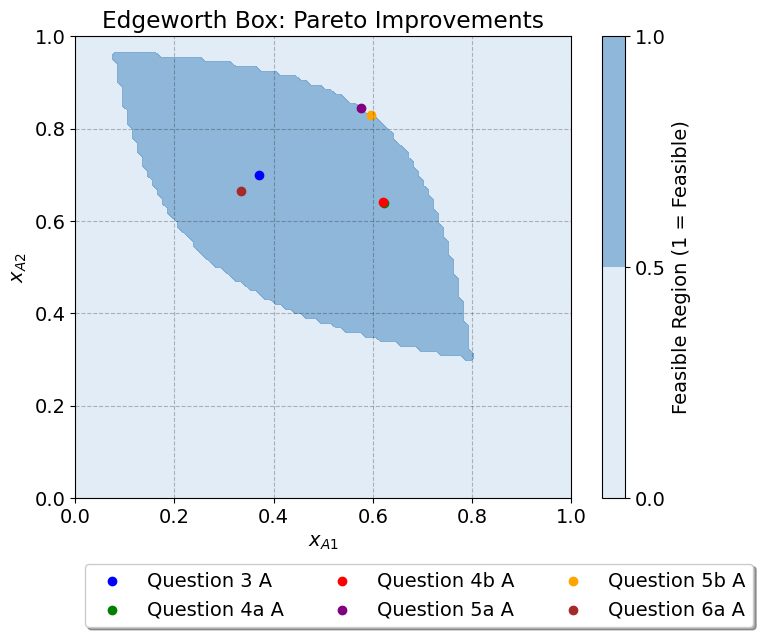

In [10]:
# Example data for allocations
results = {
    'Question 3': {
        'allocation_A': [0.37, 0.7],  # Allocation from 3
    },
    'Question 4a': {
        'allocation_A': [0.6217, 0.6396],  # EAllocation from 4a
    },
      'Question 4b': {
        'allocation_A': [0.6208, 0.64],  # Allocation from 4b
    },
    'Question 5a': {
        'allocation_A': [0.5757, 0.8444],  # Allocation from 5a
    },
      'Question 5b': {
        'allocation_A': [0.5959, 0.8282],  # Allocation from 5b
    },
    'Question 6a': {
        'allocation_A': [0.3334, 0.6658],  # Allocation from 6a
    },
}

# Constants for utility functions
alpha = 1/3
beta = 2/3

# Utility functions for agents A and B
def utility_A(x1, x2):
    return x1**alpha * x2**(1-alpha)

def utility_B(x1, x2):
    return x1**beta * x2**(1-beta)

# Function to plot Edgeworth Box with allocations
def plot_edgeworth_box(results):
    # Edgeworth Box setup
    N = 100
    x_A1_range = np.linspace(0, 1, N)
    x_A2_range = np.linspace(0, 1, N)
    X_A1, X_A2 = np.meshgrid(x_A1_range, x_A2_range)

    # Calculate utilities at each point for agents A and B
    UA = utility_A(X_A1, X_A2)
    UB = utility_B(1 - X_A1, 1 - X_A2)

    # Initial endowments and utilities
    omega_A1, omega_A2 = 0.8, 0.3
    uA_initial = utility_A(omega_A1, omega_A2)
    omega_B1, omega_B2 = 1 - omega_A1, 1 - omega_A2
    uB_initial = utility_B(omega_B1, omega_B2)

    # Mask to find combinations where both A and B are at least as well off
    pareto_improvements = (UA >= uA_initial) & (UB >= uB_initial)

    # Plotting Edgeworth Box
    plt.figure(figsize=(8, 6))
    plt.contourf(X_A1, X_A2, pareto_improvements, levels=1, cmap='Blues', alpha=0.5)
    plt.title('Edgeworth Box: Pareto Improvements')
    plt.xlabel('$x_{A1}$')
    plt.ylabel('$x_{A2}$')
    plt.colorbar(label='Feasible Region (1 = Feasible)')

    # Plot each allocation for agent A as a dot
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']  # Define colors for different allocations
    labels = list(results.keys())  # Use allocation keys as labels

    for i, (key, alloc) in enumerate(results.items()):
        plt.scatter(alloc['allocation_A'][0], alloc['allocation_A'][1], color=colors[i], label=f'{labels[i]} A')

    # Adjust legend to lower left corner outside the plot
    plt.legend(loc='lower left', bbox_to_anchor=(0, -0.3), fancybox=True, shadow=True, ncol=3)

    plt.grid(True)
    plt.show()

# Call the function to plot the Edgeworth Box with allocations
plot_edgeworth_box(results)


The above edgeworth box illustrates the calculated allocations from the previous parts of the assignment. All allocations are within the feasable region, but the allocations from 5a and 5b are placed right on the border. 

Visualising the allocations from all relevant previous parts of the asignment showcases how different variations of the problem, such as changing endowments, joint utility maximizing etc. affect the allocation.

### 7 - Draw a set W with 50 elements

In [11]:
import numpy as np

# Generate 50 random initial endowments
np.random.seed(0)  # For reproducibility
W = np.random.uniform(0, 1, size=(50, 2))

In question 7, we seek to find the market-clearing price that results in an equilibrium allocation of goods between Consumer A and Consumer B. Using an ExchangeEconomyClass with preferences represented through Cobb-Douglas utility functions, the market-clearing price is determined by iterating over a range of potential prices.

After evaluation, the equilibrium price is found to be approximately 0.97 for good 1. At this price, Consumer A receives an allocation of about 0.34 units of good 1 and 0.66 units of good 2, while Consumer B receives approximately 0.68 units of good 1 and 0.33 units of good 2. These allocations ensure that the total market clears, meaning the sum of goods consumed by both consumers matches the total supply.

### 8 - Find the market equilibrium allocation for each ωA ∈ C and plot them in the Edgeworth box

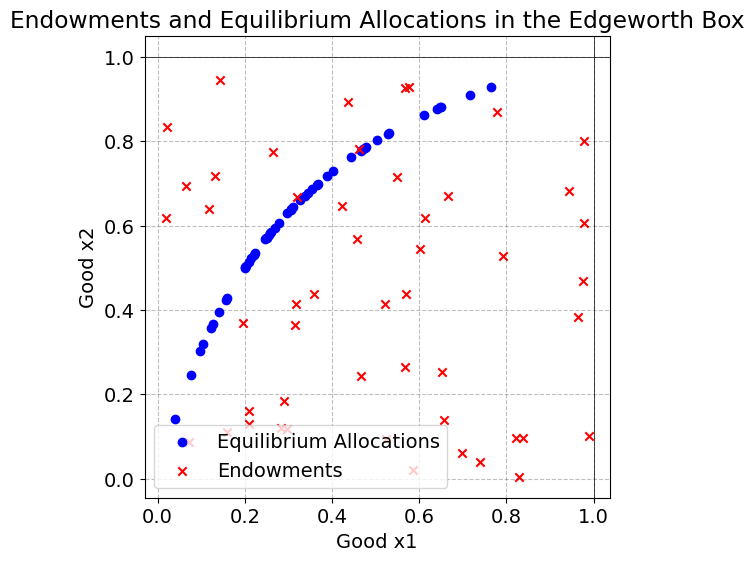

In [12]:
import matplotlib.pyplot as plt
from InaguralProject import MarketEquilibrium

equilibrium_allocations = []
endowments = []

for omega_A in W:
    omega_A1, omega_A2 = omega_A
    p1_eq = MarketEquilibrium.find_equilibrium(omega_A1, omega_A2)
    omega_B1 = 1 - omega_A1
    omega_B2 = 1 - omega_A2
    
    # Calculate equilibrium allocations
    alpha = 1/3
    beta = 2/3
    p2 = 1  # Numeraire
    xA_star_1 = alpha * (p1_eq * omega_A1 + p2 * omega_A2) / p1_eq
    xA_star_2 = (1 - alpha) * (p1_eq * omega_A1 + p2 * omega_A2) / p2
    equilibrium_allocations.append((xA_star_1, xA_star_2))
    endowments.append((omega_A1, omega_A2))

equilibrium_allocations = np.array(equilibrium_allocations)
endowments = np.array(endowments)

# Plotting the Edgeworth Box
plt.figure(figsize=(6, 6))
plt.scatter(equilibrium_allocations[:, 0], equilibrium_allocations[:, 1], c='blue', label='Equilibrium Allocations')
plt.scatter(endowments[:, 0], endowments[:, 1], c='red', marker='x', label='Endowments')
plt.xlabel('Good x1')
plt.ylabel('Good x2')
plt.title('Endowments and Equilibrium Allocations in the Edgeworth Box')
plt.axhline(1, color='black', linewidth=0.5)
plt.axvline(1, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

The above edgeworth box illustrates the the market equilibrium allocation for each ωA ∈ W. The illustrated Edgeworth box provides insight into how the initial endownments of the consumers can play a role in influencing both the prices and the distribution of goods in an exchange economy.